### Feature Engineering df_india 

In [203]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [204]:
df_india = pd.read_csv("isl_shots_2021_22.csv")

# drop duplicates if overlap exists
df_india.drop_duplicates(inplace=True)

# check shape
print("Total samples:", len(df_india))

Total samples: 3095


In [205]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               3095 non-null   int64  
 1   shot_statsbomb_xg  3095 non-null   float64
 2   minute             3095 non-null   int64  
 3   second             3095 non-null   int64  
 4   possession         3095 non-null   int64  
 5   play_pattern       3095 non-null   int64  
 6   possession_team    3095 non-null   int64  
 7   team               3095 non-null   int64  
 8   player             3095 non-null   int64  
 9   shot_body_part     3095 non-null   int64  
 10  shot_technique     3095 non-null   int64  
 11  shot_type          3095 non-null   int64  
 12  under_pressure     526 non-null    object 
 13  off_camera         5 non-null      object 
 14  shot_outcome       3095 non-null   int64  
 15  x                  3095 non-null   float64
 16  y                  3095 

In [206]:
df_india.head()

,goal,shot_statsbomb_xg,minute,second,possession,play_pattern,possession_team,team,player,shot_body_part,shot_technique,shot_type,under_pressure,off_camera,shot_outcome,x,y,competition
0,0,0.006878,10,8,26,3,0,0,17,2,1,1,NaN,NaN,4,90.8,19.0,Indian Super league 2021/2022
1,0,0.197586,13,50,31,3,1,1,8,0,1,1,NaN,NaN,2,111.8,39.3,Indian Super league 2021/2022
2,0,0.035779,20,16,44,1,1,1,15,2,1,1,NaN,NaN,2,93.9,49.1,Indian Super league 2021/2022
3,0,0.006839,29,18,68,3,1,1,0,2,1,1,NaN,NaN,0,90.2,18.8,Indian Super league 2021/2022
4,0,0.031176,38,25,82,2,1,1,18,2,1,1,NaN,NaN,3,104.5,55.9,Indian Super league 2021/2022


In [207]:
df_india.isna().sum().sort_values(ascending=False)


off_camera           3090
under_pressure       2569
shot_statsbomb_xg       0
goal                    0
minute                  0
second                  0
possession_team         0
team                    0
possession              0
play_pattern            0
shot_body_part          0
player                  0
shot_type               0
shot_technique          0
shot_outcome            0
x                       0
y                       0
competition             0
dtype: int64

In [208]:
df_india.drop(["shot_outcome"],axis=1,inplace=True)

In [209]:
df_india.drop(["off_camera","under_pressure","possession","possession_team"],axis=1,inplace=True)

In [210]:
df_india.drop(['competition',"player","second"],axis=1,inplace=True)

In [211]:
df_india.drop(["team"],axis=1,inplace=True)

In [212]:
df_india.drop(["shot_technique"],axis=1,inplace=True)

In [213]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               3095 non-null   int64  
 1   shot_statsbomb_xg  3095 non-null   float64
 2   minute             3095 non-null   int64  
 3   play_pattern       3095 non-null   int64  
 4   shot_body_part     3095 non-null   int64  
 5   shot_type          3095 non-null   int64  
 6   x                  3095 non-null   float64
 7   y                  3095 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 193.6 KB


In [214]:
for i in df_india.columns:
    print(f" {i} : {df_india[i].unique()}")

 goal : [0 1]
 shot_statsbomb_xg : [0.00687756 0.19758572 0.03577913 ... 0.04561341 0.04166246 0.08993785]
 minute : [ 10  13  20  29  38  40  45  48  54  58  61  64  67  70  75  82  84  87
  89  93  94  97 101 109 114 117 120 121 124 125 126 128   1   3   8  17
  19  35  49  50  53  60  63  65  74  77  78  83   6  18  21  22  24  26
  30  32  33  36  47  51  56  62  66  69  72  73  85  86  90   0   2  37
  42  46  57  68  71  91   9  16  55  80  88  92  96  23  41  79  14  27
  43  44  81  11  25  28  31  52  12  15  59   4   7  34   5  39  95  76
  99]
 play_pattern : [3 1 2 5 0 4 6 7]
 shot_body_part : [2 0 1 3]
 shot_type : [1 0 2 3]
 x : [ 90.8 111.8  93.9  90.2 104.5 111.   89.3 110.7  88.7 106.7  92.6 102.2
 102.9  99.  106.4  99.8 116.1 101.1  99.9 115.   98.7 113.2 103.   96.6
 110.4 117.2 104.4 107.9  91.9  80.9 108.1 104.9  97.1 105.6 100.2  99.7
 111.6 117.3 101.2 108.8 109.7  85.4  90.9  98.4 113.1  94.   90.  108.6
 115.1  86.6  81.2 117.  115.9 108.5 109.9 107.8  95.   8

In [215]:
from statsbombpy import sb
import pandas as pd

# Use Premier League 2019/2020 as an example (competition_id=72, season_id=30)
matches = sb.matches(competition_id=72, season_id=30)
match_ids = matches['match_id'].head(4).tolist()

all_play_patterns = set()
all_shot_types = set()
all_shot_body_parts = set()

for match_id in match_ids:
    events = sb.events(match_id=match_id)
    all_play_patterns.update(events['play_pattern'].dropna().unique())
    all_shot_types.update(events['shot_type'].dropna().unique())
    all_shot_body_parts.update(events['shot_body_part'].dropna().unique())

print('Unique play_pattern values:', sorted(all_play_patterns))
print('Unique shot_type values:', sorted(all_shot_types))
print('Unique shot_body_part values:', sorted(all_shot_body_parts))


C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Unique play_pattern values: ['From Corner', 'From Counter', 'From Free Kick', 'From Goal Kick', 'From Keeper', 'From Kick Off', 'From Throw In', 'Other', 'Regular Play']
Unique shot_type values: ['Free Kick', 'Open Play', 'Penalty']
Unique shot_body_part values: ['Head', 'Left Foot', 'Right Foot']


### Adjusting Shot Body Part

In [216]:
from statsbombpy import sb
import pandas as pd

# Use Premier League 2019/2020 (open data)
competition_id = 72
season_id = 30
matches = sb.matches(competition_id=competition_id, season_id=season_id)
match_ids = matches['match_id'].head(4).tolist()  # first 4 available EPL matches

# Aggregate all unique shot_body_part values across the matches
all_shot_body_parts = set()
for match_id in match_ids:
    events = sb.events(match_id=match_id)
    all_shot_body_parts.update(events['shot_body_part'].dropna().unique())

# Display all shot_body_part labels observed
print('All shot_body_part labels found:', sorted(all_shot_body_parts))

# See what numeric code pandas would assign (if you use .cat.codes on this set!)
cat = pd.Categorical(list(sorted(all_shot_body_parts)))
print('\nMapping of code to label:')
for code, catname in enumerate(cat.categories):
    print(f"{code}: '{catname}'")


C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


All shot_body_part labels found: ['Head', 'Left Foot', 'Right Foot']

Mapping of code to label:
0: 'Head'
1: 'Left Foot'
2: 'Right Foot'


In [217]:
body_part_code_to_international = {
    0: 'Head',           # EPL: Head → Head
    1: 'LeftFoot',       # EPL: Left Foot → LeftFoot
    2: 'RightFoot',      # EPL: Right Foot → RightFoot
    3: 'OtherBodyPart'   # Code 3 not present in EPL, map to OtherBodyPart
}

def map_shot_body_part(code):
    return body_part_code_to_international.get(code, 'OtherBodyPart')  # Default to OtherBodyPart if unknown

# Usage on your Indian dataframe:
df_india['shot_body_part'] = df_india['shot_body_part'].apply(map_shot_body_part)


In [218]:
for i in df_india.columns:
    print(f" {i} : {df_india[i].unique()}")

 goal : [0 1]
 shot_statsbomb_xg : [0.00687756 0.19758572 0.03577913 ... 0.04561341 0.04166246 0.08993785]
 minute : [ 10  13  20  29  38  40  45  48  54  58  61  64  67  70  75  82  84  87
  89  93  94  97 101 109 114 117 120 121 124 125 126 128   1   3   8  17
  19  35  49  50  53  60  63  65  74  77  78  83   6  18  21  22  24  26
  30  32  33  36  47  51  56  62  66  69  72  73  85  86  90   0   2  37
  42  46  57  68  71  91   9  16  55  80  88  92  96  23  41  79  14  27
  43  44  81  11  25  28  31  52  12  15  59   4   7  34   5  39  95  76
  99]
 play_pattern : [3 1 2 5 0 4 6 7]
 shot_body_part : ['RightFoot' 'Head' 'LeftFoot' 'OtherBodyPart']
 shot_type : [1 0 2 3]
 x : [ 90.8 111.8  93.9  90.2 104.5 111.   89.3 110.7  88.7 106.7  92.6 102.2
 102.9  99.  106.4  99.8 116.1 101.1  99.9 115.   98.7 113.2 103.   96.6
 110.4 117.2 104.4 107.9  91.9  80.9 108.1 104.9  97.1 105.6 100.2  99.7
 111.6 117.3 101.2 108.8 109.7  85.4  90.9  98.4 113.1  94.   90.  108.6
 115.1  86.6  81.2 

** since shot body part labelled '2' is the most common , im assigning it as "RightFoot" as most players are right footed,then '1' as "LeftFoot"
, '0' as 'Header' and "3" as "OtherBodyPart"

### Adjusting ShotType

In [219]:
from statsbombpy import sb
import pandas as pd

# Use Premier League 2019/2020 (open data)
competition_id = 72
season_id = 30
matches = sb.matches(competition_id=competition_id, season_id=season_id)
match_ids = matches['match_id'].head(4).tolist()  # first 4 available EPL matches

# Aggregate all unique shot_type values across the matches
all_shot_types = set()
for match_id in match_ids:
    events = sb.events(match_id=match_id)
    all_shot_types.update(events['shot_type'].dropna().unique())

# Display all the types of shots observed in these matches, as strings
print('All shot_type labels found:', sorted(all_shot_types))

# See what numeric code pandas would assign (if you use .cat.codes on this set!)
cat = pd.Categorical(list(sorted(all_shot_types)))
print('\nMapping of code to label:')
for code, catname in enumerate(cat.categories):
    print(f"{code}: '{catname}'")


C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


All shot_type labels found: ['Free Kick', 'Open Play', 'Penalty']

Mapping of code to label:
0: 'Free Kick'
1: 'Open Play'
2: 'Penalty'


In [220]:
def map_shot_type(code):
    mapping = {
        0: 'DirectFreeKick',         
        1: 'OpenPlay',          
        2: 'Penalty',   
        3: 'SetPiece',         
    }
    return mapping.get(code, 'OpenPlay')  # Fallback for any unexpected code
df_india['shot_type'] = df_india['shot_type'].apply(map_shot_type)


In [221]:
for i in df_india.columns:
    print(f" {i} : {df_india[i].unique()}")

 goal : [0 1]
 shot_statsbomb_xg : [0.00687756 0.19758572 0.03577913 ... 0.04561341 0.04166246 0.08993785]
 minute : [ 10  13  20  29  38  40  45  48  54  58  61  64  67  70  75  82  84  87
  89  93  94  97 101 109 114 117 120 121 124 125 126 128   1   3   8  17
  19  35  49  50  53  60  63  65  74  77  78  83   6  18  21  22  24  26
  30  32  33  36  47  51  56  62  66  69  72  73  85  86  90   0   2  37
  42  46  57  68  71  91   9  16  55  80  88  92  96  23  41  79  14  27
  43  44  81  11  25  28  31  52  12  15  59   4   7  34   5  39  95  76
  99]
 play_pattern : [3 1 2 5 0 4 6 7]
 shot_body_part : ['RightFoot' 'Head' 'LeftFoot' 'OtherBodyPart']
 shot_type : ['OpenPlay' 'DirectFreeKick' 'Penalty' 'SetPiece']
 x : [ 90.8 111.8  93.9  90.2 104.5 111.   89.3 110.7  88.7 106.7  92.6 102.2
 102.9  99.  106.4  99.8 116.1 101.1  99.9 115.   98.7 113.2 103.   96.6
 110.4 117.2 104.4 107.9  91.9  80.9 108.1 104.9  97.1 105.6 100.2  99.7
 111.6 117.3 101.2 108.8 109.7  85.4  90.9  98.4 11

### Adjusting Play Pattern 

In [91]:
# Step 1: Convert 'play_pattern' to category dtype if it's not already
cat_series = df_india['play_pattern'].astype('category')

# Step 2: Show all unique category codes and their string names
for idx, category in enumerate(cat_series.cat.categories):
    print(f"{idx}: '{category}'")


0: '0'
1: '1'
2: '2'
3: '3'
4: '4'
5: '5'
6: '6'
7: '7'


In [222]:
from statsbombpy import sb
import pandas as pd

# Replace with any StatsBomb match ID for an open dataset (global data)
events = sb.events(match_id=3788741)
cat_field = 'play_pattern'
cat = pd.Categorical(events[cat_field])
for code, catname in enumerate(cat.categories):
    print(f"{code}: '{catname}'")


C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


0: 'From Corner'
1: 'From Counter'
2: 'From Free Kick'
3: 'From Goal Kick'
4: 'From Keeper'
5: 'From Kick Off'
6: 'From Throw In'
7: 'Regular Play'


In [223]:
from statsbombpy import sb
import pandas as pd

# Premier League 2019/2020 (open data)
competition_id = 72
season_id = 30
matches = sb.matches(competition_id=competition_id, season_id=season_id)
match_ids = matches['match_id'].head(4).tolist()  # Take first 4 valid match IDs

# Aggregate all unique play_pattern values across the matches
all_play_patterns = set()
for match_id in match_ids:
    events = sb.events(match_id=match_id)
    all_play_patterns.update(events['play_pattern'].dropna().unique())

# List all observed play_pattern values (at least once, across these matches)
print('All play_pattern labels found:', sorted(all_play_patterns))

# Show mapping from code to label, as pandas would assign in this order
cat = pd.Categorical(list(sorted(all_play_patterns)))
print('\nMapping of code to label:')
for code, catname in enumerate(cat.categories):
    print(f"{code}: '{catname}'")


C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Pavitra\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


All play_pattern labels found: ['From Corner', 'From Counter', 'From Free Kick', 'From Goal Kick', 'From Keeper', 'From Kick Off', 'From Throw In', 'Other', 'Regular Play']

Mapping of code to label:
0: 'From Corner'
1: 'From Counter'
2: 'From Free Kick'
3: 'From Goal Kick'
4: 'From Keeper'
5: 'From Kick Off'
6: 'From Throw In'
7: 'Other'
8: 'Regular Play'


In [224]:
pattern_code_to_string = {
    0: 'From Corner',
    1: 'From Counter',
    2: 'From Free Kick',
    3: 'From Goal Kick',
    4: 'From Keeper',
    5: 'From Kick Off',
    6: 'From Throw In',
    7: 'Regular Play',
}

def map_pattern_to_international(code):
    string_map = {
        'From Corner': 'FromCorner',
        'From Counter': 'OpenPlay',
        'Regular Play': 'OpenPlay',
        'From Free Kick': 'DirectFreekick',
        'From Goal Kick': 'SetPiece',
        'From Keeper': 'SetPiece',
        'From Kick Off': 'SetPiece',
        'From Throw In': 'SetPiece',
        'Other': 'SetPiece',  # if ever present
    }
    pattern_str = pattern_code_to_string.get(code, None)
    return string_map.get(pattern_str, 'SetPiece')

# Apply to your df_india
# Creates a column with correct international group labels
df_india['play_pattern'] = df_india['play_pattern'].apply(map_pattern_to_international)


In [225]:
for i in df_india.columns:
    print(f" {i} : {df_india[i].unique()}")

 goal : [0 1]
 shot_statsbomb_xg : [0.00687756 0.19758572 0.03577913 ... 0.04561341 0.04166246 0.08993785]
 minute : [ 10  13  20  29  38  40  45  48  54  58  61  64  67  70  75  82  84  87
  89  93  94  97 101 109 114 117 120 121 124 125 126 128   1   3   8  17
  19  35  49  50  53  60  63  65  74  77  78  83   6  18  21  22  24  26
  30  32  33  36  47  51  56  62  66  69  72  73  85  86  90   0   2  37
  42  46  57  68  71  91   9  16  55  80  88  92  96  23  41  79  14  27
  43  44  81  11  25  28  31  52  12  15  59   4   7  34   5  39  95  76
  99]
 play_pattern : ['SetPiece' 'OpenPlay' 'DirectFreekick' 'FromCorner']
 shot_body_part : ['RightFoot' 'Head' 'LeftFoot' 'OtherBodyPart']
 shot_type : ['OpenPlay' 'DirectFreeKick' 'Penalty' 'SetPiece']
 x : [ 90.8 111.8  93.9  90.2 104.5 111.   89.3 110.7  88.7 106.7  92.6 102.2
 102.9  99.  106.4  99.8 116.1 101.1  99.9 115.   98.7 113.2 103.   96.6
 110.4 117.2 104.4 107.9  91.9  80.9 108.1 104.9  97.1 105.6 100.2  99.7
 111.6 117.3 10

In [226]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               3095 non-null   int64  
 1   shot_statsbomb_xg  3095 non-null   float64
 2   minute             3095 non-null   int64  
 3   play_pattern       3095 non-null   object 
 4   shot_body_part     3095 non-null   object 
 5   shot_type          3095 non-null   object 
 6   x                  3095 non-null   float64
 7   y                  3095 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 193.6+ KB


In [227]:
df_india.to_csv("df_india.csv", index=False)


### Calculating Distances and Angles

In [228]:
df_india_new = pd.read_csv("df_india.csv")

In [229]:
df_india_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               3095 non-null   int64  
 1   shot_statsbomb_xg  3095 non-null   float64
 2   minute             3095 non-null   int64  
 3   play_pattern       3095 non-null   object 
 4   shot_body_part     3095 non-null   object 
 5   shot_type          3095 non-null   object 
 6   x                  3095 non-null   float64
 7   y                  3095 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 193.6+ KB


In [230]:
import numpy as np

# Get pitch size from data
pitch_length = df_india_new["x"].max()
pitch_width = df_india_new["y"].max()

# Scale StatsBomb 120x80 → FIFA 105x68
df_india_new["x_m"] = df_india_new["x"] * (105 / pitch_length)
df_india_new["y_m"] = df_india_new["y"] * (68 / pitch_width)

# Goal dimensions (centered at y=34)
goal_x = 105
goal_y_center = 68 / 2
goal_y_top = goal_y_center + 7.32 / 2
goal_y_bottom = goal_y_center - 7.32 / 2

# ---- Distance to goal ----
df_india_new["distance_to_goal"] = np.sqrt(
    (goal_x - df_india_new["x_m"])**2 + (goal_y_center - df_india_new["y_m"])**2
)

# Clip distances to max half-pitch (~60m) just for safety
df_india_new["distance_to_goal"] = df_india_new["distance_to_goal"].clip(0, 60)

# ---- Angle to goal (open angle between posts) ----
df_india_new["angle_to_goal"] = np.abs(
    np.arctan2(df_india_new["y_m"] - goal_y_bottom, goal_x - df_india_new["x_m"]) -
    np.arctan2(df_india_new["y_m"] - goal_y_top, goal_x - df_india_new["x_m"])
)

# Clip to [0, π] radians
df_india_new["angle_to_goal"] = df_india_new["angle_to_goal"].clip(0, np.pi)

# Convert to degrees
df_india_new["angle_to_goal_deg"] = np.degrees(df_india_new["angle_to_goal"])

# Clip degrees between 0–180 for visualization sanity
df_india_new["angle_to_goal_deg"] = df_india_new["angle_to_goal_deg"].clip(0, 180)

print(df_india_new[["x", "y", "x_m", "y_m", "distance_to_goal", "angle_to_goal_deg"]].head())


       x     y      x_m        y_m  distance_to_goal  angle_to_goal_deg
0   90.8  19.0  79.4500  16.231156         31.121284          11.078928
1  111.8  39.3  97.8250  33.572864          7.187703          53.922442
2   93.9  49.1  82.1625  41.944724         24.179951          16.310917
3   90.2  18.8  78.9250  16.060302         31.650251          10.930416
4  104.5  55.9  91.4375  47.753769         19.315992          15.429061


In [231]:
print(df_india_new["distance_to_goal"].describe())
print(df_india_new["angle_to_goal_deg"].describe())

count    3095.000000
mean       17.388623
std         8.201637
min         1.589728
25%        10.646027
50%        16.742693
75%        22.957270
max        60.000000
Name: distance_to_goal, dtype: float64
count    3095.000000
mean       25.997563
std        16.789629
min         0.000000
25%        15.346737
50%        20.152452
75%        31.445931
max       162.218784
Name: angle_to_goal_deg, dtype: float64


### Angles and Distances 

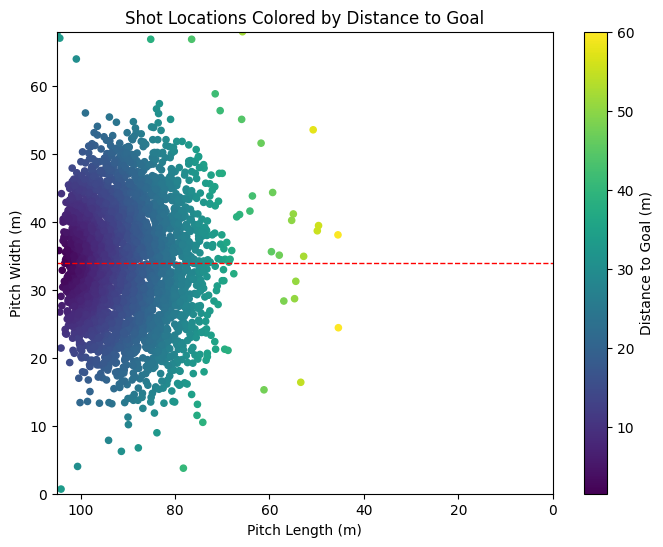

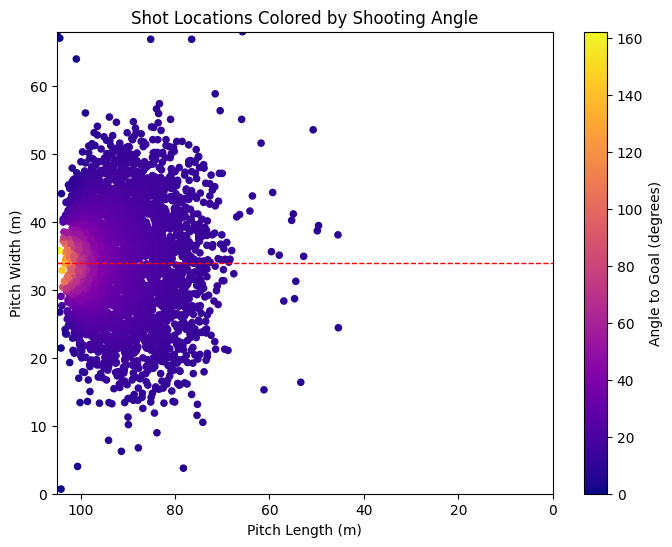

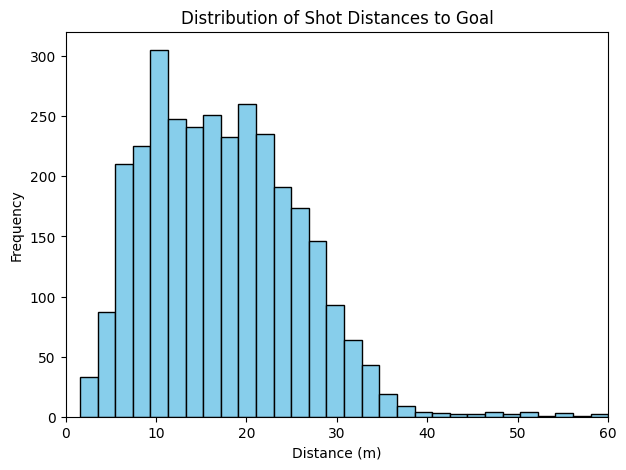

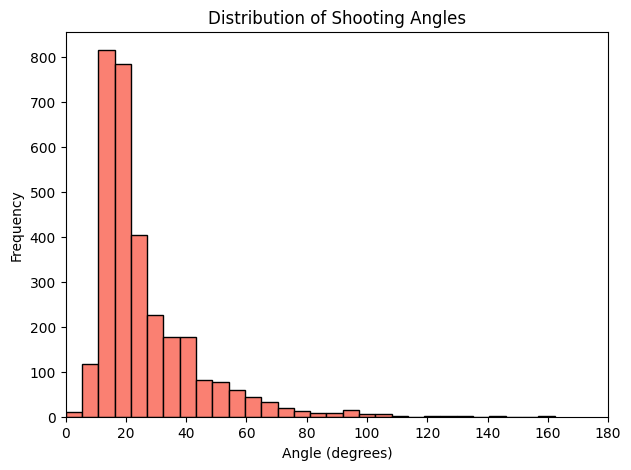

In [232]:
import matplotlib.pyplot as plt

# ---- Scatter: Distance to Goal ----
plt.figure(figsize=(8,6))
sc1 = plt.scatter(
    df_india_new["x_m"], df_india_new["y_m"], 
    c=df_india_new["distance_to_goal"], cmap="viridis", s=20
)
plt.colorbar(sc1, label="Distance to Goal (m)")
plt.axhline(34, color="red", linestyle="--", linewidth=1)  # goal line
plt.title("Shot Locations Colored by Distance to Goal")
plt.xlabel("Pitch Length (m)")
plt.ylabel("Pitch Width (m)")
plt.xlim(0, 105)
plt.ylim(0, 68)
plt.gca().invert_xaxis()   # flip pitch so goal is on the right
plt.show()

# ---- Scatter: Angle to Goal ----
plt.figure(figsize=(8,6))
sc2 = plt.scatter(
    df_india_new["x_m"], df_india_new["y_m"], 
    c=df_india_new["angle_to_goal_deg"], cmap="plasma", s=20
)
plt.colorbar(sc2, label="Angle to Goal (degrees)")
plt.axhline(34, color="red", linestyle="--", linewidth=1)
plt.title("Shot Locations Colored by Shooting Angle")
plt.xlabel("Pitch Length (m)")
plt.ylabel("Pitch Width (m)")
plt.xlim(0, 105)
plt.ylim(0, 68)
plt.gca().invert_xaxis()
plt.show()

# ---- Histogram: Distance ----
plt.figure(figsize=(7,5))
plt.hist(df_india_new["distance_to_goal"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Shot Distances to Goal")
plt.xlabel("Distance (m)")
plt.ylabel("Frequency")
plt.xlim(0, 60)   # max distance ~60m
plt.show()

# ---- Histogram: Angle ----
plt.figure(figsize=(7,5))
plt.hist(df_india_new["angle_to_goal_deg"], bins=30, color="salmon", edgecolor="black")
plt.title("Distribution of Shooting Angles")
plt.xlabel("Angle (degrees)")
plt.ylabel("Frequency")
plt.xlim(0, 180)  # angles between 0°–180°
plt.show()


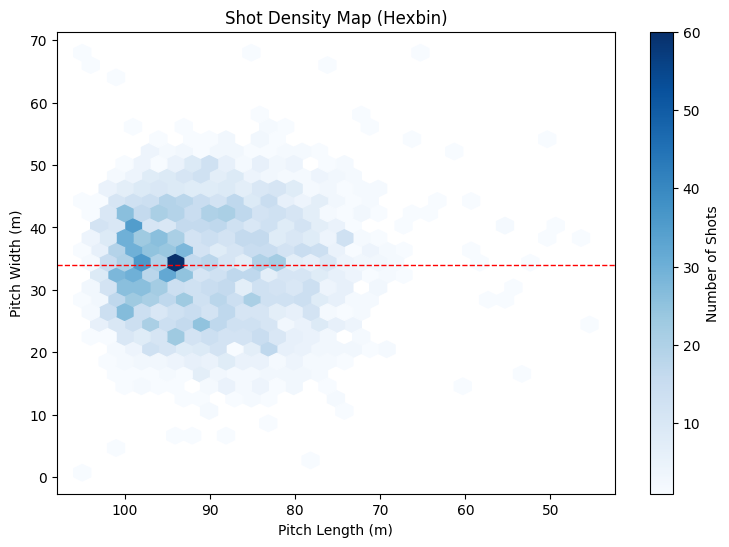

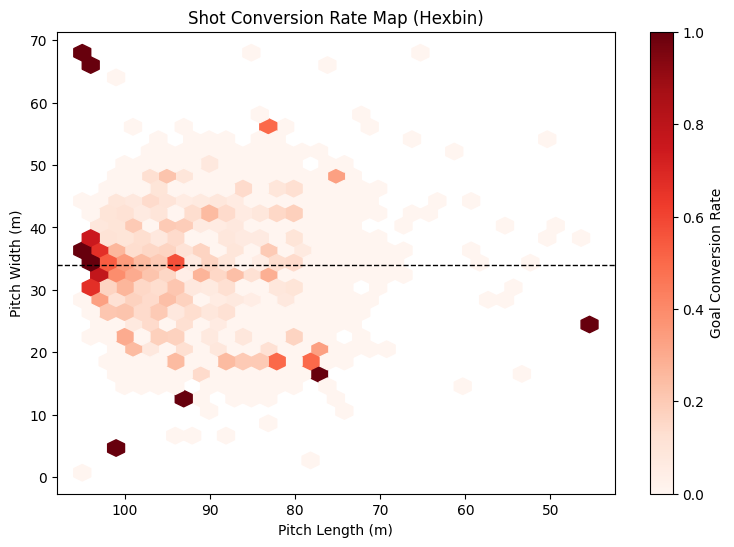

In [233]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Hexbin heatmap: Shot density ----
plt.figure(figsize=(9,6))
hb = plt.hexbin(df_india_new["x_m"], df_india_new["y_m"], gridsize=30, cmap="Blues", mincnt=1)
plt.colorbar(hb, label="Number of Shots")
plt.axhline(34, color="red", linestyle="--", linewidth=1)
plt.title("Shot Density Map (Hexbin)")
plt.xlabel("Pitch Length (m)")
plt.ylabel("Pitch Width (m)")
plt.gca().invert_xaxis()
plt.show()

# ---- Hexbin weighted by goal outcome ----
plt.figure(figsize=(9,6))
hb = plt.hexbin(
    df_india_new["x_m"], df_india_new["y_m"], 
    C=df_india_new["goal"], 
    reduce_C_function=np.mean, 
    gridsize=30, 
    cmap="Reds", 
    mincnt=1
)
plt.colorbar(hb, label="Goal Conversion Rate")
plt.axhline(34, color="black", linestyle="--", linewidth=1)
plt.title("Shot Conversion Rate Map (Hexbin)")
plt.xlabel("Pitch Length (m)")
plt.ylabel("Pitch Width (m)")
plt.gca().invert_xaxis()
plt.show()


In [234]:
for i in df_india_new.columns:
    print(f" {i} : {df_india_new[i].unique()}")

 goal : [0 1]
 shot_statsbomb_xg : [0.00687756 0.19758572 0.03577913 ... 0.04561341 0.04166246 0.08993785]
 minute : [ 10  13  20  29  38  40  45  48  54  58  61  64  67  70  75  82  84  87
  89  93  94  97 101 109 114 117 120 121 124 125 126 128   1   3   8  17
  19  35  49  50  53  60  63  65  74  77  78  83   6  18  21  22  24  26
  30  32  33  36  47  51  56  62  66  69  72  73  85  86  90   0   2  37
  42  46  57  68  71  91   9  16  55  80  88  92  96  23  41  79  14  27
  43  44  81  11  25  28  31  52  12  15  59   4   7  34   5  39  95  76
  99]
 play_pattern : ['SetPiece' 'OpenPlay' 'DirectFreekick' 'FromCorner']
 shot_body_part : ['RightFoot' 'Head' 'LeftFoot' 'OtherBodyPart']
 shot_type : ['OpenPlay' 'DirectFreeKick' 'Penalty' 'SetPiece']
 x : [ 90.8 111.8  93.9  90.2 104.5 111.   89.3 110.7  88.7 106.7  92.6 102.2
 102.9  99.  106.4  99.8 116.1 101.1  99.9 115.   98.7 113.2 103.   96.6
 110.4 117.2 104.4 107.9  91.9  80.9 108.1 104.9  97.1 105.6 100.2  99.7
 111.6 117.3 10

In [235]:
df_india_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               3095 non-null   int64  
 1   shot_statsbomb_xg  3095 non-null   float64
 2   minute             3095 non-null   int64  
 3   play_pattern       3095 non-null   object 
 4   shot_body_part     3095 non-null   object 
 5   shot_type          3095 non-null   object 
 6   x                  3095 non-null   float64
 7   y                  3095 non-null   float64
 8   x_m                3095 non-null   float64
 9   y_m                3095 non-null   float64
 10  distance_to_goal   3095 non-null   float64
 11  angle_to_goal      3095 non-null   float64
 12  angle_to_goal_deg  3095 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 314.5+ KB


In [236]:
df_india_new.drop(["x","y"],axis=1,inplace=True)

In [237]:
df_india_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   goal               3095 non-null   int64  
 1   shot_statsbomb_xg  3095 non-null   float64
 2   minute             3095 non-null   int64  
 3   play_pattern       3095 non-null   object 
 4   shot_body_part     3095 non-null   object 
 5   shot_type          3095 non-null   object 
 6   x_m                3095 non-null   float64
 7   y_m                3095 non-null   float64
 8   distance_to_goal   3095 non-null   float64
 9   angle_to_goal      3095 non-null   float64
 10  angle_to_goal_deg  3095 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 266.1+ KB


### more feature engineereing 

In [238]:
import numpy as np
import pandas as pd

def feature_engineer(df_india_new):
    df = df_india_new.copy()

    # --- Distance and log transforms ---
    df["distance_to_goal_sq"] = df["distance_to_goal"] ** 2
    df["log_distance"] = np.log1p(df["distance_to_goal"])  # log(1+distance)

    # --- Zonal features (based on x_m, y_m) ---
    def zone_classifier(row):
        if row["distance_to_goal"] <= 18 and abs(row["y_m"]) <= 10:
            return "central_box"
        elif row["distance_to_goal"] <= 18 and row["y_m"] < -10:
            return "wide_left"
        elif row["distance_to_goal"] <= 18 and row["y_m"] > 10:
            return "wide_right"
        else:
            return "outside_box"
    df["zone"] = df.apply(zone_classifier, axis=1)

    # --- Temporal features ---
    df["is_first_half"] = (df["minute"] <= 45).astype(int)
    df["is_extra_time"] = (df["minute"] > 90).astype(int)

    # --- Buckets ---
    df["distance_bucket"] = pd.cut(df["distance_to_goal"],
                                   bins=[0, 10, 20, 30, 40, 60],
                                   labels=["0-10", "10-20", "20-30", "30-40", "40+"])

    df["angle_bucket"] = pd.cut(df["angle_to_goal"],
                                bins=[0, 10, 20, 30, 40, 60, 90],
                                labels=["0-10", "10-20", "20-30", "30-40", "40-60", "60+"])

    # --- Interaction term ---
    df["distance_x_angle"] = df["distance_to_goal"] * df["angle_to_goal"]

    return df


In [239]:
df_india_new=feature_engineer(df_india_new)

In [240]:
df_india_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   goal                 3095 non-null   int64   
 1   shot_statsbomb_xg    3095 non-null   float64 
 2   minute               3095 non-null   int64   
 3   play_pattern         3095 non-null   object  
 4   shot_body_part       3095 non-null   object  
 5   shot_type            3095 non-null   object  
 6   x_m                  3095 non-null   float64 
 7   y_m                  3095 non-null   float64 
 8   distance_to_goal     3095 non-null   float64 
 9   angle_to_goal        3095 non-null   float64 
 10  angle_to_goal_deg    3095 non-null   float64 
 11  distance_to_goal_sq  3095 non-null   float64 
 12  log_distance         3095 non-null   float64 
 13  zone                 3095 non-null   object  
 14  is_first_half        3095 non-null   int64   
 15  is_extra_time        

In [241]:
for i in df_india_new.columns:
    print(f" {i} : {df_india_new[i].unique()}")

 goal : [0 1]
 shot_statsbomb_xg : [0.00687756 0.19758572 0.03577913 ... 0.04561341 0.04166246 0.08993785]
 minute : [ 10  13  20  29  38  40  45  48  54  58  61  64  67  70  75  82  84  87
  89  93  94  97 101 109 114 117 120 121 124 125 126 128   1   3   8  17
  19  35  49  50  53  60  63  65  74  77  78  83   6  18  21  22  24  26
  30  32  33  36  47  51  56  62  66  69  72  73  85  86  90   0   2  37
  42  46  57  68  71  91   9  16  55  80  88  92  96  23  41  79  14  27
  43  44  81  11  25  28  31  52  12  15  59   4   7  34   5  39  95  76
  99]
 play_pattern : ['SetPiece' 'OpenPlay' 'DirectFreekick' 'FromCorner']
 shot_body_part : ['RightFoot' 'Head' 'LeftFoot' 'OtherBodyPart']
 shot_type : ['OpenPlay' 'DirectFreeKick' 'Penalty' 'SetPiece']
 x_m : [ 79.45    97.825   82.1625  78.925   91.4375  97.125   78.1375  96.8625
  77.6125  93.3625  81.025   89.425   90.0375  86.625   93.1     87.325
 101.5875  88.4625  87.4125 100.625   86.3625  99.05    90.125   84.525
  96.6    102.5

**one hot encoding**

In [242]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_features_consistent(df, required_dummy_cols=None):
    """
    Encode categorical columns and ensure consistent dummy columns
    based on a predefined list of required columns.
    """
    # Label encode play_pattern
    le_play_pattern = LabelEncoder()
    df['play_pattern_encoded'] = le_play_pattern.fit_transform(df['play_pattern'].astype(str))
    
    # Columns to one-hot encode
    one_hot_columns = ['shot_body_part', 'shot_type', 'zone', 'distance_bucket', 'angle_bucket']
    
    # One-hot encode
    df_one_hot = pd.get_dummies(df[one_hot_columns].astype(str), prefix=one_hot_columns, drop_first=True)
    
    # Concatenate encoded columns to original dataframe
    df_encoded = pd.concat([df, df_one_hot], axis=1)
    
    # Drop original categorical columns
    df_encoded.drop(columns=one_hot_columns + ['play_pattern'], inplace=True)
    
    # If we have a required list of dummy columns — ensure all exist
    if required_dummy_cols is not None:
        for col in required_dummy_cols:
            if col not in df_encoded.columns:
                df_encoded[col] = False  # Fill missing ones with False
    
    # Return consistent column order
    return df_encoded, le_play_pattern


# ----------------------
# Usage Example
# ----------------------
if __name__ == "__main__":
    # List of dummy columns to always include
    required_dummy_cols = [
        'shot_body_part_LeftFoot',
        'shot_body_part_OtherBodyPart',
        'shot_body_part_RightFoot',
        'shot_type_FromCorner',
        'shot_type_OpenPlay',
        'shot_type_Penalty',
        'shot_type_SetPiece',
        'zone_wide_right',
        'distance_bucket_10-20',
        'distance_bucket_20-30',
        'distance_bucket_30-40',
        'distance_bucket_40+',
        'angle_bucket_nan'
    ]
    
    # Encode your dataset
    df_india_encoded, play_pattern_encoder = encode_features_consistent(df_india_new, required_dummy_cols)
    
    print("✅ Encoded DataFrame columns:")
    print(df_india_encoded.info())


✅ Encoded DataFrame columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goal                          3095 non-null   int64  
 1   shot_statsbomb_xg             3095 non-null   float64
 2   minute                        3095 non-null   int64  
 3   x_m                           3095 non-null   float64
 4   y_m                           3095 non-null   float64
 5   distance_to_goal              3095 non-null   float64
 6   angle_to_goal                 3095 non-null   float64
 7   angle_to_goal_deg             3095 non-null   float64
 8   distance_to_goal_sq           3095 non-null   float64
 9   log_distance                  3095 non-null   float64
 10  is_first_half                 3095 non-null   int64  
 11  is_extra_time                 3095 non-null   int64  
 12  distance_x_angle              309

In [248]:
df_india_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goal                          3095 non-null   int64  
 1   shot_statsbomb_xg             3095 non-null   float64
 2   minute                        3095 non-null   int64  
 3   x_m                           3095 non-null   float64
 4   y_m                           3095 non-null   float64
 5   distance_to_goal              3095 non-null   float64
 6   angle_to_goal                 3095 non-null   float64
 7   angle_to_goal_deg             3095 non-null   float64
 8   distance_to_goal_sq           3095 non-null   float64
 9   log_distance                  3095 non-null   float64
 10  is_first_half                 3095 non-null   int64  
 11  is_extra_time                 3095 non-null   int64  
 12  distance_x_angle              3095 non-null   float64
 13  pla

In [249]:
df_india_encoded.to_csv("df_india_encoded.csv", index=False)



In [254]:
df_india_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goal                          3095 non-null   int64  
 1   shot_statsbomb_xg             3095 non-null   float64
 2   minute                        3095 non-null   int64  
 3   x_m                           3095 non-null   float64
 4   y_m                           3095 non-null   float64
 5   distance_to_goal              3095 non-null   float64
 6   angle_to_goal                 3095 non-null   float64
 7   angle_to_goal_deg             3095 non-null   float64
 8   distance_to_goal_sq           3095 non-null   float64
 9   log_distance                  3095 non-null   float64
 10  is_first_half                 3095 non-null   int64  
 11  is_extra_time                 3095 non-null   int64  
 12  distance_x_angle              3095 non-null   float64
 13  pla

In [252]:
for i in df_india_encoded.columns:
    print(f" {i} : {df_india_encoded[i].unique()}")

 goal : [0 1]
 shot_statsbomb_xg : [0.00687756 0.19758572 0.03577913 ... 0.04561341 0.04166246 0.08993785]
 minute : [ 10  13  20  29  38  40  45  48  54  58  61  64  67  70  75  82  84  87
  89  93  94  97 101 109 114 117 120 121 124 125 126 128   1   3   8  17
  19  35  49  50  53  60  63  65  74  77  78  83   6  18  21  22  24  26
  30  32  33  36  47  51  56  62  66  69  72  73  85  86  90   0   2  37
  42  46  57  68  71  91   9  16  55  80  88  92  96  23  41  79  14  27
  43  44  81  11  25  28  31  52  12  15  59   4   7  34   5  39  95  76
  99]
 x_m : [ 79.45    97.825   82.1625  78.925   91.4375  97.125   78.1375  96.8625
  77.6125  93.3625  81.025   89.425   90.0375  86.625   93.1     87.325
 101.5875  88.4625  87.4125 100.625   86.3625  99.05    90.125   84.525
  96.6    102.55    91.35    94.4125  80.4125  70.7875  94.5875  91.7875
  84.9625  92.4     87.675   87.2375  97.65   102.6375  88.55    95.2
  95.9875  74.725   79.5375  86.1     98.9625  82.25    78.75    95.025


In [255]:
import numpy as np
import pandas as pd

# --------------------------------
# 1. Shot Zone Encoding
# --------------------------------
def assign_shot_zone(x, y):
    """
    Assigns a shot to a zone on the pitch based on x (goal to far side) and y (width).
    Adjust bounds if your data uses a different pitch scale.
    """
    if x >= 104 and x <= 116 and y >= 34 and y <= 54:
        return 'six_yard_box'
    elif x >= 88 and x < 120 and y >= 18 and y <= 62:
        return 'penalty_area'
    elif x >= 88 and x < 120 and y > 62:
        return 'penalty_area_right'
    elif x >= 88 and x < 120 and y < 18:
        return 'penalty_area_left'
    elif x < 88:
        return 'outside_box'
    else:
        return 'other'

# Apply shot zone assignment to df_india_encoded
# (Assumes df_india_encoded has columns 'x_m', 'y_m')
df_india_encoded['shot_zone_label'] = df_india_encoded.apply(
    lambda row: assign_shot_zone(row['x_m'], row['y_m']), axis=1
)

# --------------------------------
# 2. Heatmap/Grid Encoding
# --------------------------------
# Bin pitch into a 5x5 grid
x_bins = np.linspace(df_india_encoded['x_m'].min(), df_india_encoded['x_m'].max(), 6)
y_bins = np.linspace(df_india_encoded['y_m'].min(), df_india_encoded['y_m'].max(), 6)

df_india_encoded['x_bin'] = pd.cut(df_india_encoded['x_m'], bins=x_bins, labels=False)
df_india_encoded['y_bin'] = pd.cut(df_india_encoded['y_m'], bins=y_bins, labels=False)

df_india_encoded['heatmap_cell'] = df_india_encoded['x_bin'].astype(str) + '_' + df_india_encoded['y_bin'].astype(str)

# --------------------------------
# 3. One-Hot Encoding
# --------------------------------
df_india_encoded = pd.get_dummies(
    df_india_encoded,
    columns=['shot_zone_label', 'heatmap_cell'],
    drop_first=True  # optional: drops one col per category for multicollinearity
)

# --------------------------------
# 4. Ready for modeling
# --------------------------------
print("Feature encoding complete. Columns now numeric and ready for XGBoost.")
print("Sample columns:", df_india_encoded.columns[:10])


Feature encoding complete. Columns now numeric and ready for XGBoost.
Sample columns: Index(['goal', 'shot_statsbomb_xg', 'minute', 'x_m', 'y_m', 'distance_to_goal',
       'angle_to_goal', 'angle_to_goal_deg', 'distance_to_goal_sq',
       'log_distance'],
      dtype='object')


In [256]:
df_india_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   goal                                3095 non-null   int64  
 1   shot_statsbomb_xg                   3095 non-null   float64
 2   minute                              3095 non-null   int64  
 3   x_m                                 3095 non-null   float64
 4   y_m                                 3095 non-null   float64
 5   distance_to_goal                    3095 non-null   float64
 6   angle_to_goal                       3095 non-null   float64
 7   angle_to_goal_deg                   3095 non-null   float64
 8   distance_to_goal_sq                 3095 non-null   float64
 9   log_distance                        3095 non-null   float64
 10  is_first_half                       3095 non-null   int64  
 11  is_extra_time                       3095 no